In [197]:
import os
import cv2
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

In [198]:
#Get images from directory
images = []
labels = []
index = 0
for directory in glob.glob('BO/*'):
    name = directory+'/*.png'
    for filename in glob.glob(name):
        img=cv2.imread(filename)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        resized_img = img_array.resize((227, 227))
        images.append(np.array(resized_img))
        labels.append(index)
    index+=1

In [199]:
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  900 
No. of labels loaded =  900
<class 'list'> <class 'list'>


In [200]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (900, 227, 227, 3) 
Labels shape =  (900,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


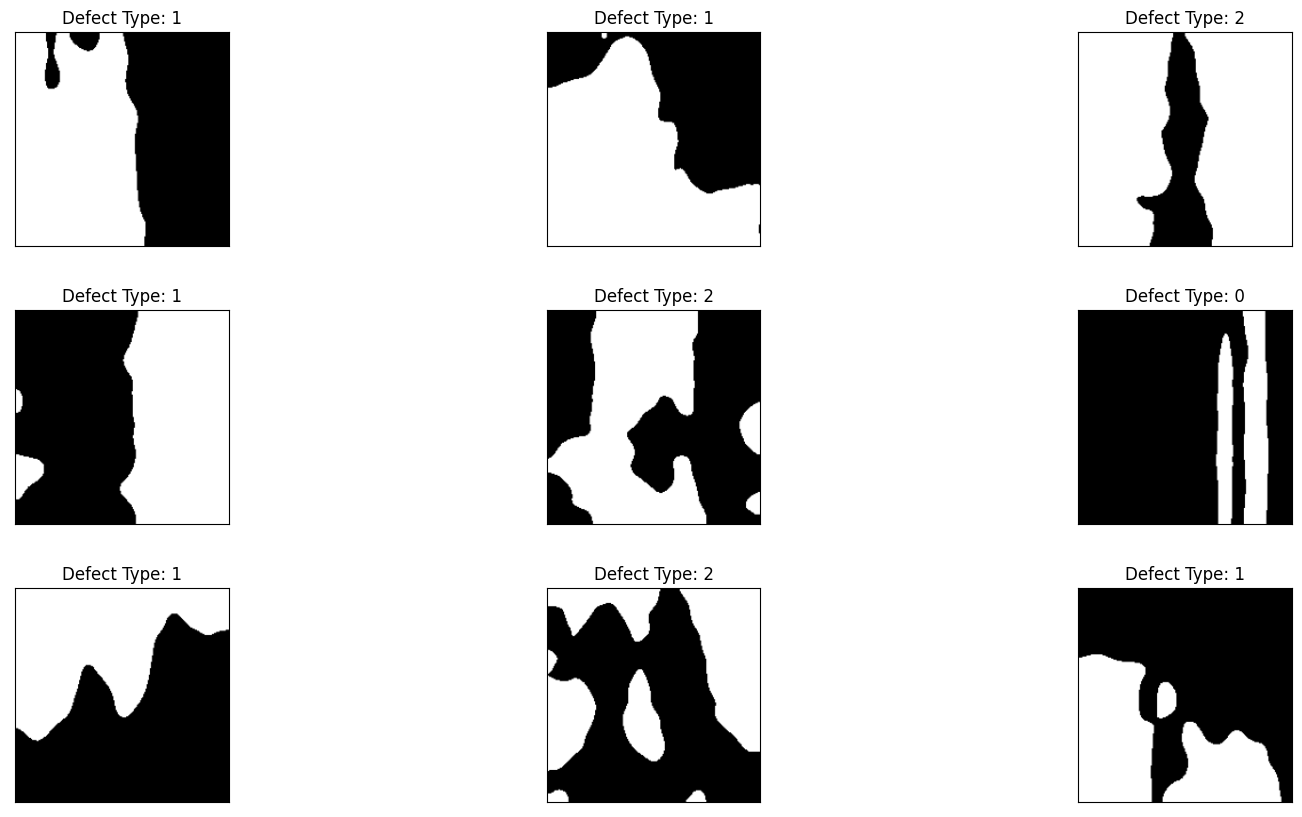

In [201]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Defect Type: {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [202]:
#Data Shuffling

random_seed = 42
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

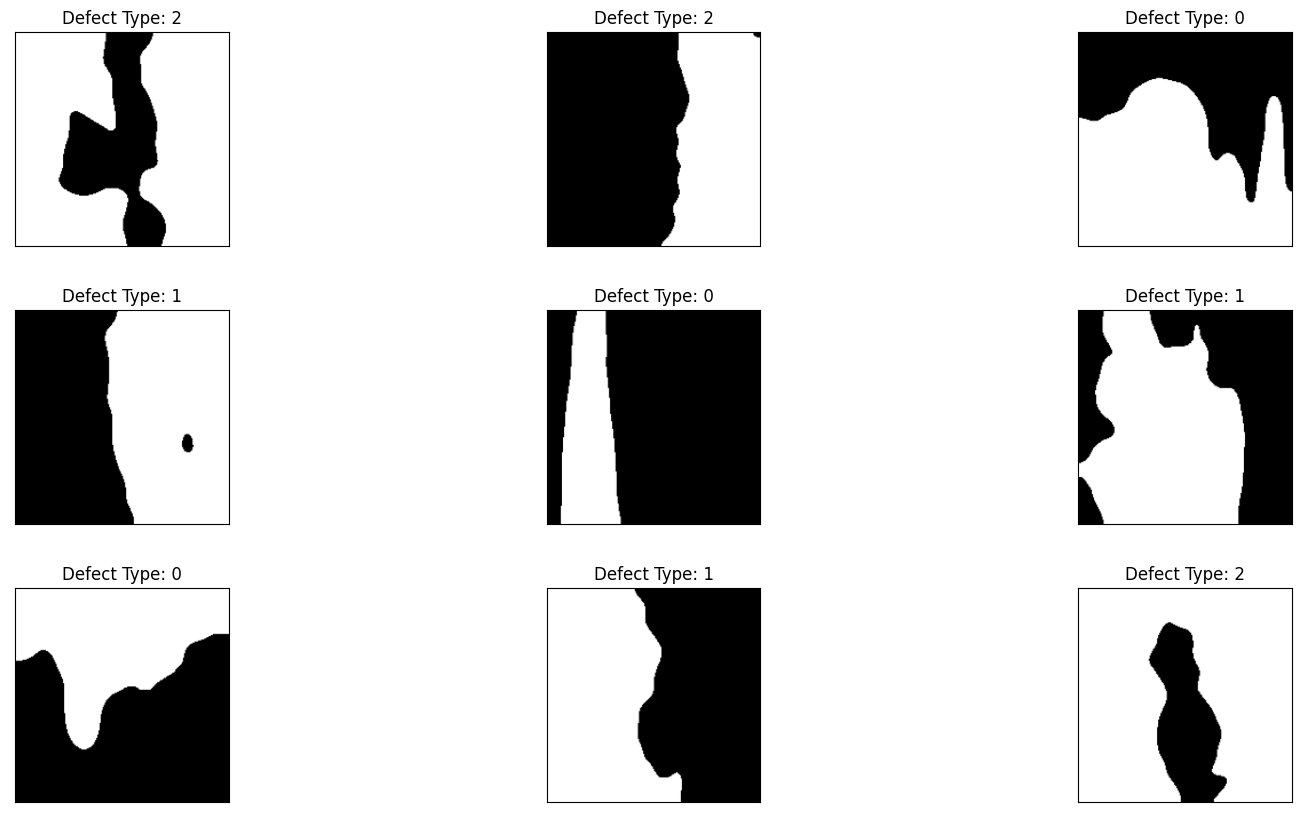

In [203]:
display_rand_images(images, labels)

In [204]:
import pickle

with open("fileImages.json","wb") as fp:
    pickle.dump(images, fp)

with open("fileImages.json","rb") as fp:  
    images = pickle.load(fp)
images


with open("fileLabels.json","wb") as fp:
    pickle.dump(labels, fp)

with open("fileLabels.json","rb") as fp:  
    labels = pickle.load(fp)
labels

array([0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2,
       1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1,

In [205]:
x_train_BO, x_test_BO, y_train_BO, y_test_BO = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)


In [ ]:
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

with open("trainImages.json","wb") as fp:
    pickle.dump(x_train, fp)
with open("testImages.json","wb") as fp:
    pickle.dump(x_test, fp)
with open("trainLabels.json","wb") as fp:
    pickle.dump(y_train, fp)
with open("testLabels.json","wb") as fp:
    pickle.dump(y_test, fp)

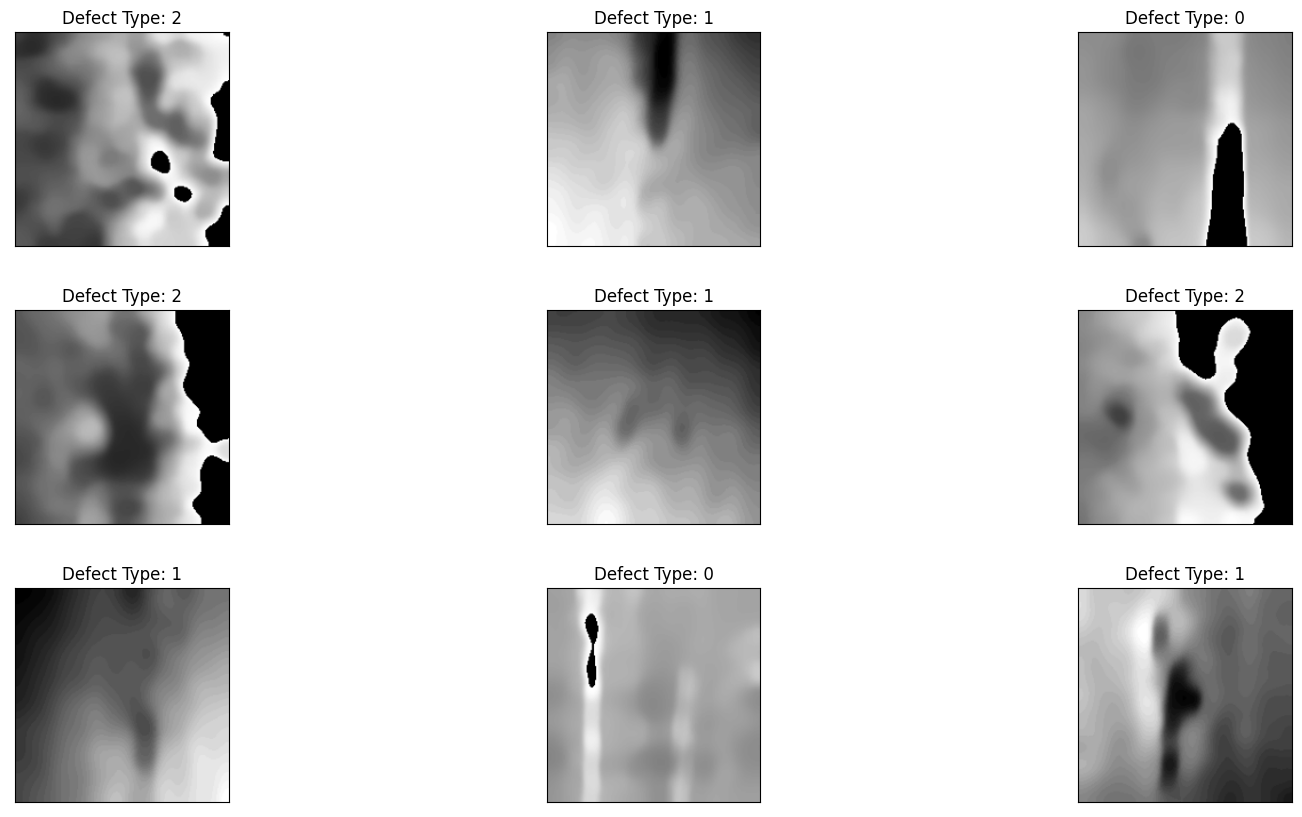

In [169]:
#display_rand_images(x_train, y_train)

### ALEX-NET CNN MODEL

In [206]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_78 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_66 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                     

In [207]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [208]:
modelBO = model
#modelTM=model
#modelZG=model

In [209]:
modelBO.fit(x_train_BO, y_train_BO, epochs=100
#modelZG.fit(x_train_TM, y_train_TM, epochs=100)
#modelZG.fit(x_train_ZG, y_train_ZG, epochs=100)

Epoch 1/100
23/23 [==============================] - 37s 1s/step - loss: 2.8648 - accuracy: 0.4736
Epoch 2/100
23/23 [==============================] - 38s 2s/step - loss: 1.7586 - accuracy: 0.6597
Epoch 3/100
23/23 [==============================] - 41s 2s/step - loss: 1.1389 - accuracy: 0.7167
Epoch 4/100
23/23 [==============================] - 43s 2s/step - loss: 0.9925 - accuracy: 0.7153
Epoch 5/100
23/23 [==============================] - 42s 2s/step - loss: 0.8646 - accuracy: 0.7278
Epoch 6/100
23/23 [==============================] - 42s 2s/step - loss: 0.7085 - accuracy: 0.7458
Epoch 7/100
23/23 [==============================] - 43s 2s/step - loss: 0.7389 - accuracy: 0.7458
Epoch 8/100
23/23 [==============================] - 41s 2s/step - loss: 0.6317 - accuracy: 0.7681
Epoch 9/100
23/23 [==============================] - 42s 2s/step - loss: 0.6994 - accuracy: 0.7417
Epoch 10/100
23/23 [==============================] - 42s 2s/step - loss: 0.5658 - accuracy: 0.7917
Epoch 11/

Epoch 83/100
23/23 [==============================] - 37s 2s/step - loss: 0.0125 - accuracy: 0.9972
Epoch 84/100
23/23 [==============================] - 37s 2s/step - loss: 0.0167 - accuracy: 0.9958
Epoch 85/100
23/23 [==============================] - 37s 2s/step - loss: 0.0128 - accuracy: 0.9986
Epoch 86/100
23/23 [==============================] - 37s 2s/step - loss: 0.0052 - accuracy: 0.9986
Epoch 87/100
23/23 [==============================] - 37s 2s/step - loss: 0.0109 - accuracy: 0.9972
Epoch 88/100
23/23 [==============================] - 38s 2s/step - loss: 0.0111 - accuracy: 0.9958
Epoch 89/100
23/23 [==============================] - 37s 2s/step - loss: 0.0559 - accuracy: 0.9819
Epoch 90/100
23/23 [==============================] - 37s 2s/step - loss: 0.0887 - accuracy: 0.9722
Epoch 91/100
23/23 [==============================] - 37s 2s/step - loss: 0.0759 - accuracy: 0.9750
Epoch 92/100
23/23 [==============================] - 38s 2s/step - loss: 0.0594 - accuracy: 0.9736


In [210]:
modelTM.fit(x_train_TM, y_train_TM, epochs=100)

Epoch 1/100
23/23 [==============================] - 43s 2s/step - loss: 2.3992 - accuracy: 0.5292
Epoch 2/100
23/23 [==============================] - 37s 2s/step - loss: 1.3213 - accuracy: 0.6292
Epoch 3/100
23/23 [==============================] - 38s 2s/step - loss: 1.0576 - accuracy: 0.6597
Epoch 4/100
23/23 [==============================] - 37s 2s/step - loss: 0.9677 - accuracy: 0.6903
Epoch 5/100
23/23 [==============================] - 37s 2s/step - loss: 0.7782 - accuracy: 0.7028
Epoch 6/100
23/23 [==============================] - 38s 2s/step - loss: 0.8015 - accuracy: 0.7069
Epoch 7/100
23/23 [==============================] - 37s 2s/step - loss: 0.8433 - accuracy: 0.6792
Epoch 8/100
23/23 [==============================] - 37s 2s/step - loss: 0.7569 - accuracy: 0.7153
Epoch 9/100
23/23 [==============================] - 37s 2s/step - loss: 0.5808 - accuracy: 0.7708
Epoch 10/100
23/23 [==============================] - 37s 2s/step - loss: 0.6054 - accuracy: 0.7472
Epoch 11/

23/23 [==============================] - 38s 2s/step - loss: 0.1217 - accuracy: 0.9431
Epoch 84/100
23/23 [==============================] - 39s 2s/step - loss: 0.0984 - accuracy: 0.9542
Epoch 85/100
23/23 [==============================] - 39s 2s/step - loss: 0.0656 - accuracy: 0.9667
Epoch 86/100
23/23 [==============================] - 38s 2s/step - loss: 0.0894 - accuracy: 0.9625
Epoch 87/100
23/23 [==============================] - 39s 2s/step - loss: 0.0828 - accuracy: 0.9611
Epoch 88/100
23/23 [==============================] - 38s 2s/step - loss: 0.0942 - accuracy: 0.9653
Epoch 89/100
23/23 [==============================] - 38s 2s/step - loss: 0.1058 - accuracy: 0.9556
Epoch 90/100
23/23 [==============================] - 38s 2s/step - loss: 0.2340 - accuracy: 0.9056
Epoch 91/100
23/23 [==============================] - 38s 2s/step - loss: 0.1890 - accuracy: 0.9167
Epoch 92/100
23/23 [==============================] - 38s 2s/step - loss: 0.1559 - accuracy: 0.9278
Epoch 93/100


In [211]:
modelZG.fit(x_train_ZG, y_train_ZG, epochs=100)

Epoch 1/100
23/23 [==============================] - 43s 2s/step - loss: 2.6067 - accuracy: 0.4917
Epoch 2/100
23/23 [==============================] - 39s 2s/step - loss: 1.6542 - accuracy: 0.5736
Epoch 3/100
23/23 [==============================] - 39s 2s/step - loss: 1.0903 - accuracy: 0.6306
Epoch 4/100
23/23 [==============================] - 39s 2s/step - loss: 1.0158 - accuracy: 0.6569
Epoch 5/100
23/23 [==============================] - 38s 2s/step - loss: 0.9228 - accuracy: 0.6625
Epoch 6/100
23/23 [==============================] - 39s 2s/step - loss: 0.6887 - accuracy: 0.7097
Epoch 7/100
23/23 [==============================] - 38s 2s/step - loss: 0.7310 - accuracy: 0.7139
Epoch 8/100
23/23 [==============================] - 38s 2s/step - loss: 0.6434 - accuracy: 0.7250
Epoch 9/100
23/23 [==============================] - 39s 2s/step - loss: 0.6283 - accuracy: 0.7375
Epoch 10/100
23/23 [==============================] - 39s 2s/step - loss: 0.5860 - accuracy: 0.7417
Epoch 11/

23/23 [==============================] - 44s 2s/step - loss: 0.0708 - accuracy: 0.9722
Epoch 84/100
23/23 [==============================] - 43s 2s/step - loss: 0.0858 - accuracy: 0.9639
Epoch 85/100
23/23 [==============================] - 44s 2s/step - loss: 0.0955 - accuracy: 0.9639
Epoch 86/100
23/23 [==============================] - 44s 2s/step - loss: 0.1024 - accuracy: 0.9625
Epoch 87/100
23/23 [==============================] - 50s 2s/step - loss: 0.1600 - accuracy: 0.9319
Epoch 88/100
23/23 [==============================] - 42s 2s/step - loss: 0.1783 - accuracy: 0.9347
Epoch 89/100
23/23 [==============================] - 41s 2s/step - loss: 0.1177 - accuracy: 0.9472
Epoch 90/100
23/23 [==============================] - 40s 2s/step - loss: 0.0572 - accuracy: 0.9792
Epoch 91/100
23/23 [==============================] - 39s 2s/step - loss: 0.0644 - accuracy: 0.9708
Epoch 92/100
23/23 [==============================] - 39s 2s/step - loss: 0.0701 - accuracy: 0.9750
Epoch 93/100


In [215]:
modelBO.save('alexNetBO.h5')

In [216]:
modelTM.save('alexNetTM.h5')

In [217]:
modelZG.save('alexNetZG.h5')

In [227]:
loss, accuracy = modelZG.evaluate(x_test_ZG, y_test_ZG)

print(loss,accuracy)
#BO=0.688
#TM=0.794
#ZG=0.855

6/6 [==============================] - 3s 347ms/step - loss: 0.8901 - accuracy: 0.8556
0.8900963068008423 0.855555534362793


In [119]:
pred = model.predict(x_test)

pred.shape

6/6 [==============================] - 3s 398ms/step


(180, 20)

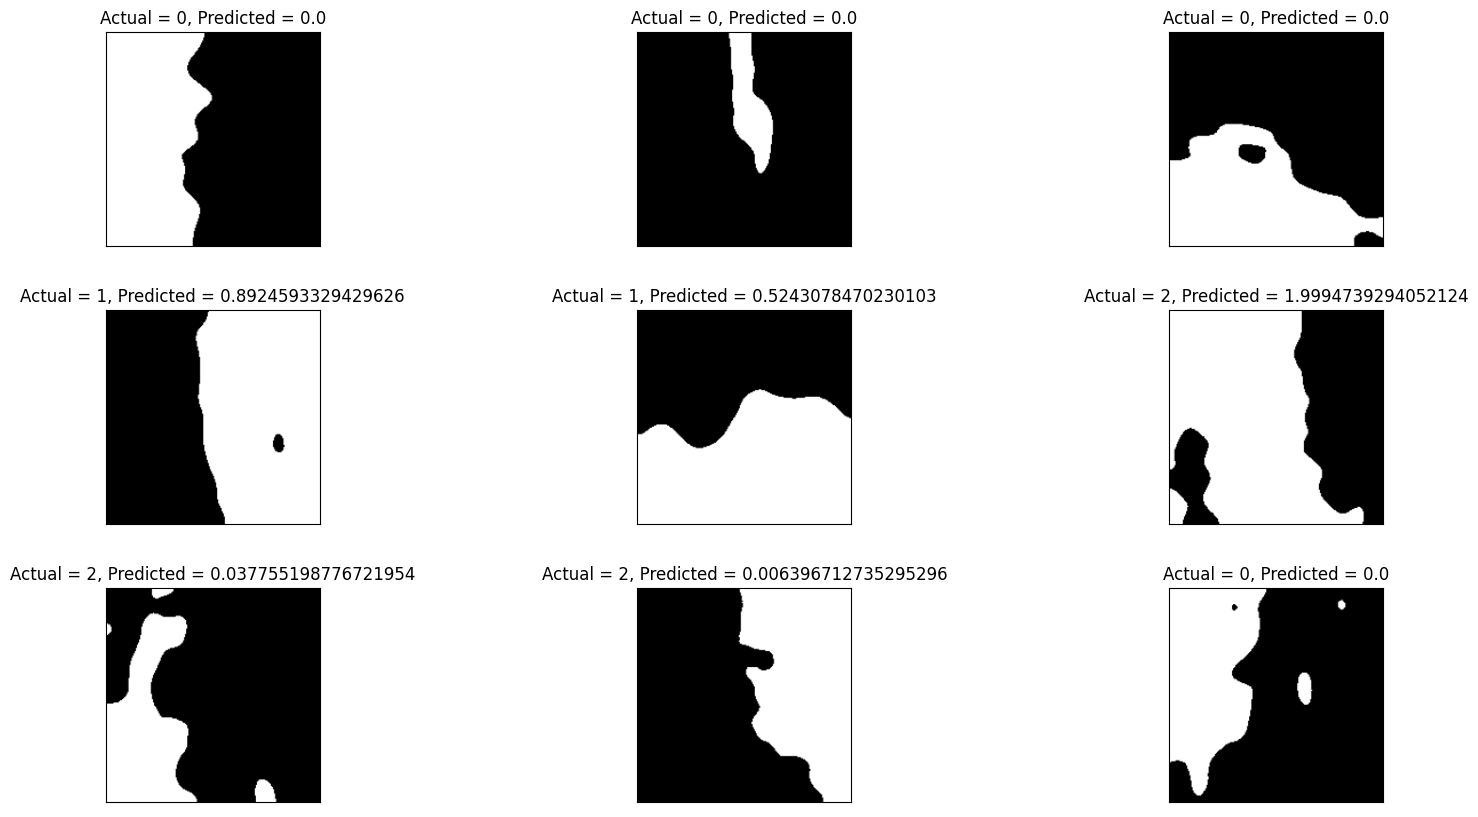

In [120]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()